In [98]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_signal(duration=3, sampling_rate=50, freq1=3, freq2=6, noise_level=0.3, plot=True):
    time = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = 0.7 * np.sin(2 * np.pi * freq1 * time) + 0.3 * np.sin(2 * np.pi * freq2 * time)
    noise = noise_level * np.random.normal(size=time.shape)
    random_signal = signal + noise

    if plot:
        plt.figure(figsize=(12, 4))
        plt.plot(time, random_signal, label="Random Signal")
        plt.title("Generated Random Signal")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        # plt.grid(True)
        # plt.legend()
        plt.tight_layout()
        plt.show()
    return time, random_signal

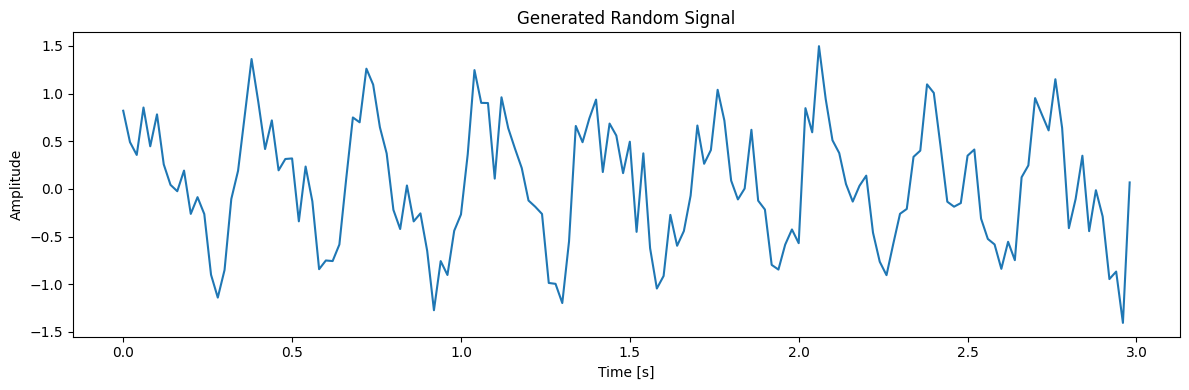

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
        1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
        1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
        1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
        1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
        1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
        2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
        2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
        2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
        2.86, 2.88, 2.9 , 2.92, 2.94, 

In [99]:
generate_random_signal()

In [ ]:
def generate_clean_signal(duration=3, sampling_rate=50, freq1=3, freq2=15):
    time = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = 0.7 * np.sin(2 * np.pi * freq1 * time) + 0.3 * np.sin(2 * np.pi * freq2 * time)
    return time, signal

def get_index_range(time, start_time, end_time):
    start_idx = np.searchsorted(time, start_time)
    end_idx = np.searchsorted(time, end_time)
    return start_idx, end_idx

def add_bias(signal, time, start_time, end_time, bias_value=0.5):
    modified = signal.copy()
    start_idx, end_idx = get_index_range(time, start_time, end_time)
    modified[start_idx:end_idx] += bias_value
    return modified

def add_drift(signal, time, start_time, end_time, max_drift=1.0):
    modified = signal.copy()
    start_idx, end_idx = get_index_range(time, start_time, end_time)
    drift = np.linspace(0, max_drift, end_idx - start_idx)
    modified[start_idx:end_idx] += drift
    return modified

def add_erratic(signal, time, start_time, end_time, noise_level=0.5, seed=None):
    if seed is not None:
        np.random.seed(seed)
    modified = signal.copy()
    start_idx, end_idx = get_index_range(time, start_time, end_time)
    noise = noise_level * np.random.normal(size=(end_idx - start_idx))
    modified[start_idx:end_idx] += noise
    return modified

def add_spike(signal, time, start_time, end_time, num_spikes=5, spike_height=3.0, seed=None):
    if seed is not None:
        np.random.seed(seed)
    modified = signal.copy()
    start_idx, end_idx = get_index_range(time, start_time, end_time)
    spike_indices = np.random.choice(np.arange(start_idx, end_idx), size=num_spikes, replace=False)
    signs = 2 * np.random.randint(0, 2, size=num_spikes) - 1
    modified[spike_indices] += spike_height * signs
    return modified

def add_stuck(signal, time, start_time, end_time):
    modified = signal.copy()
    start_idx, end_idx = get_index_range(time, start_time, end_time)
    stuck_value = modified[start_idx]
    modified[start_idx:end_idx] = stuck_value
    return modified

# --- Utility Function to Plot with Highlighted Region ---

def plot_comparison(time, original, modified, start_time, end_time, title="Noise Comparison"):
    plt.figure(figsize=(12, 4))
    plt.plot(time, original, label="Original", color="orange")
    plt.plot(time, modified, label="Noisy", color="blue")
    plt.axvspan(start_time, end_time, color='pink', alpha=0.5, label="Noise Region")
    plt.title(title)
    # plt.xlabel("Time [s]")
    # plt.ylabel("Amplitude")
    # plt.legend()
    plt.grid(True)
    # plt.tight_layout()
    plt.show()

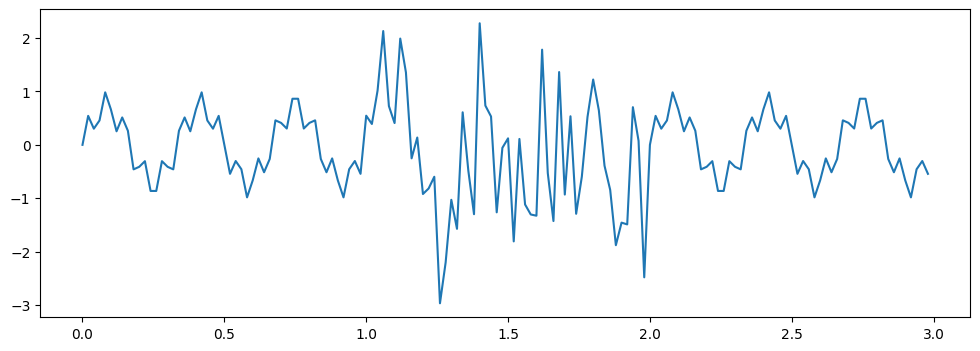

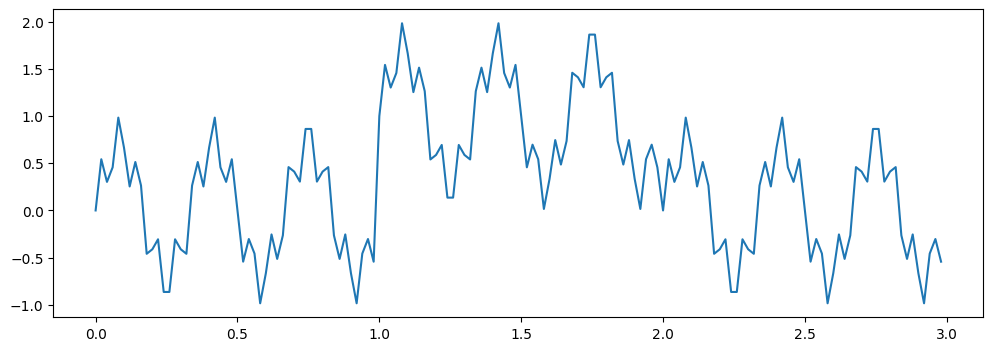

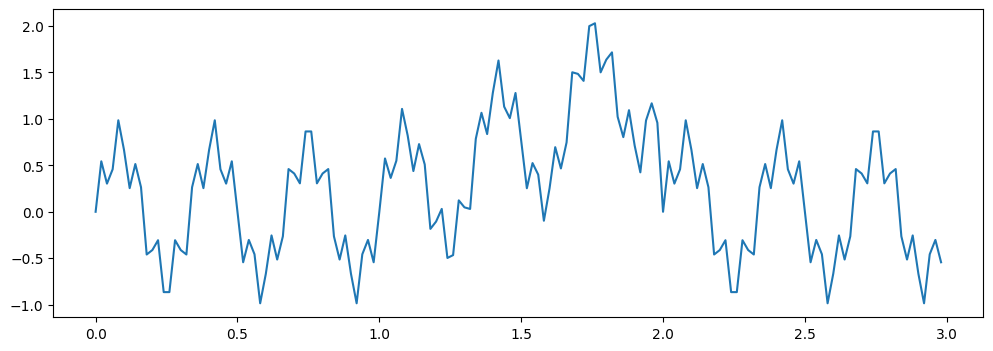

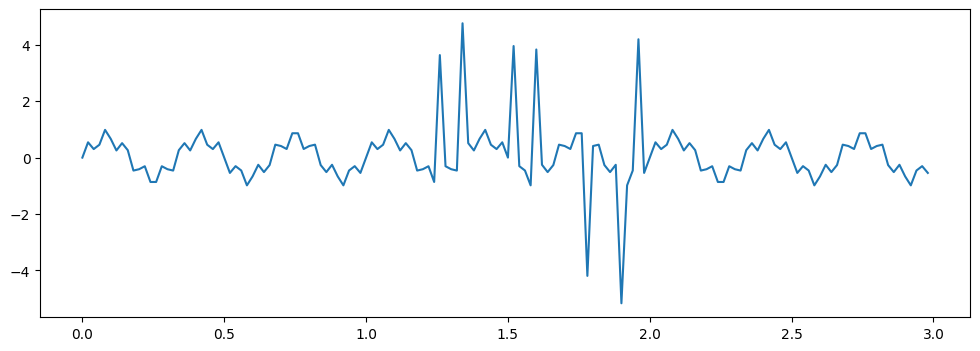

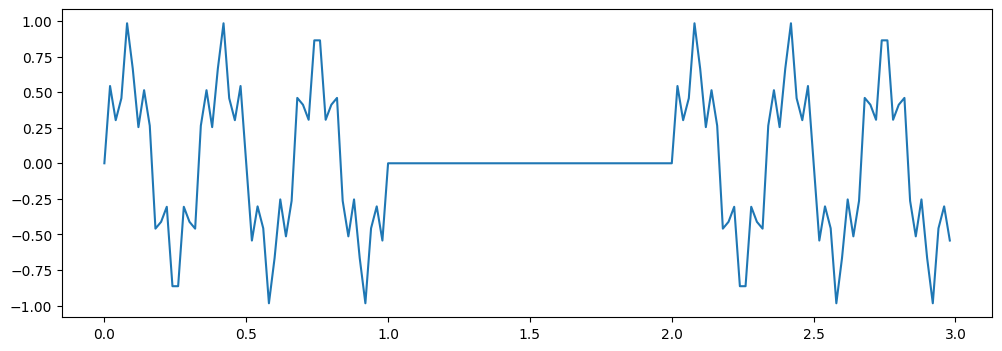

In [101]:
# Generate signal
time, clean = generate_clean_signal()

# Define time range for noise injection
start_time = 1
end_time = 2

# Original
# plot_comparison(time, clean, clean, start_time, end_time, title="Original Signal")

# Inject erratic noise
erratic = add_erratic(clean, time, start_time, end_time, noise_level=1.1, seed=42)
plot_comparison(time, clean, erratic, start_time, end_time, title="Erratic Noise Injection")

# Inject bias
biased = add_bias(clean, time, start_time, end_time, bias_value=1.0)
plot_comparison(time, clean, biased, start_time, end_time, title="Bias Noise Injection")

# Inject drift
drifted = add_drift(clean, time, start_time, end_time, max_drift=1.5)
plot_comparison(time, clean, drifted, start_time, end_time, title="Drift Noise Injection")

# Inject spike
spiked = add_spike(clean, time, start_time, end_time, num_spikes=7, spike_height=4.5, seed=42)
plot_comparison(time, clean, spiked, start_time, end_time, title="Spike Noise Injection")

# Inject stuck
stuck = add_stuck(clean, time, start_time, end_time)
plot_comparison(time, clean, stuck, start_time, end_time, title="Stuck Noise Injection")

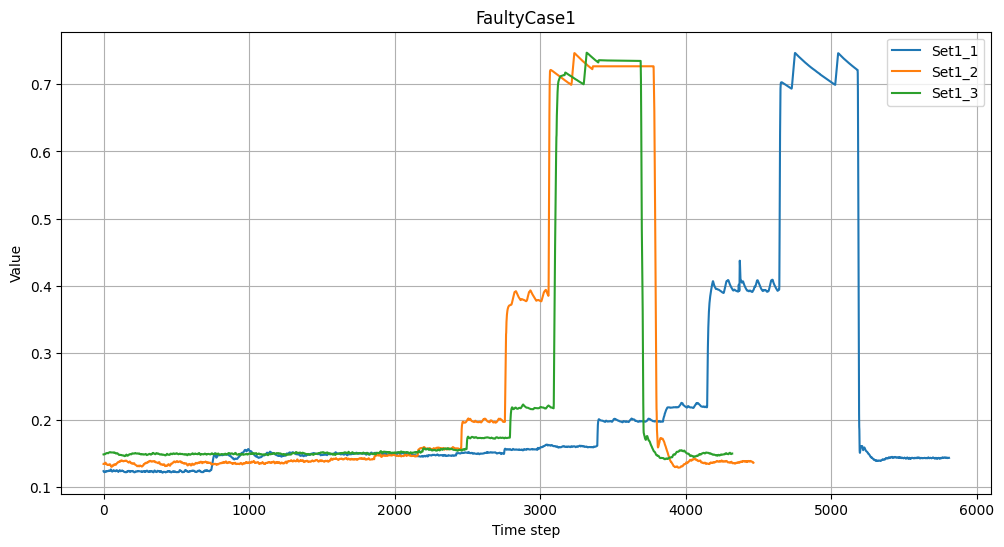

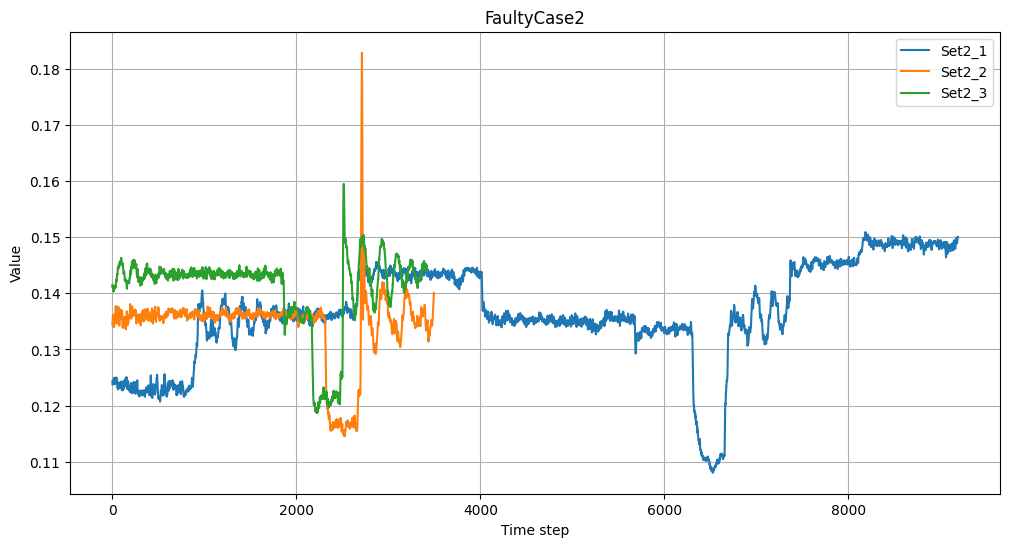

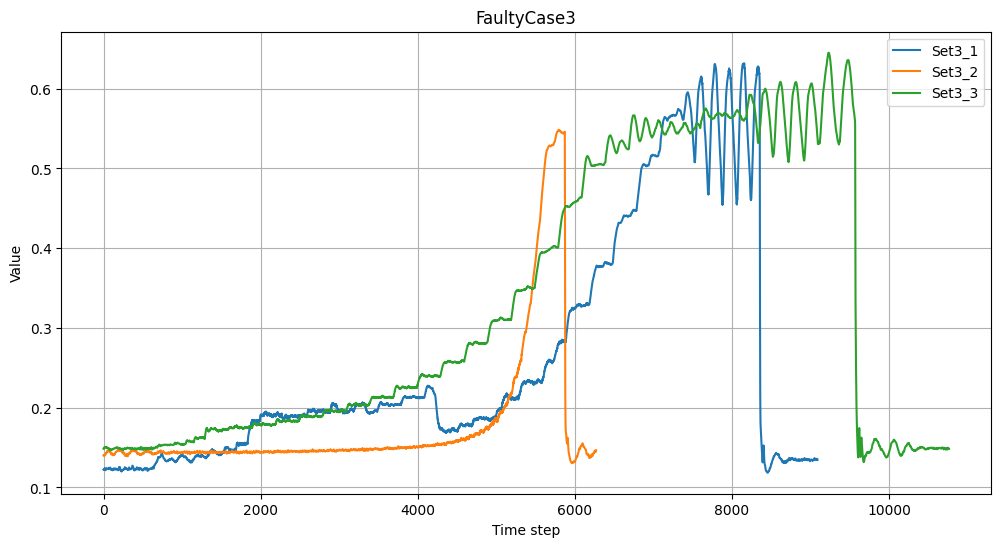

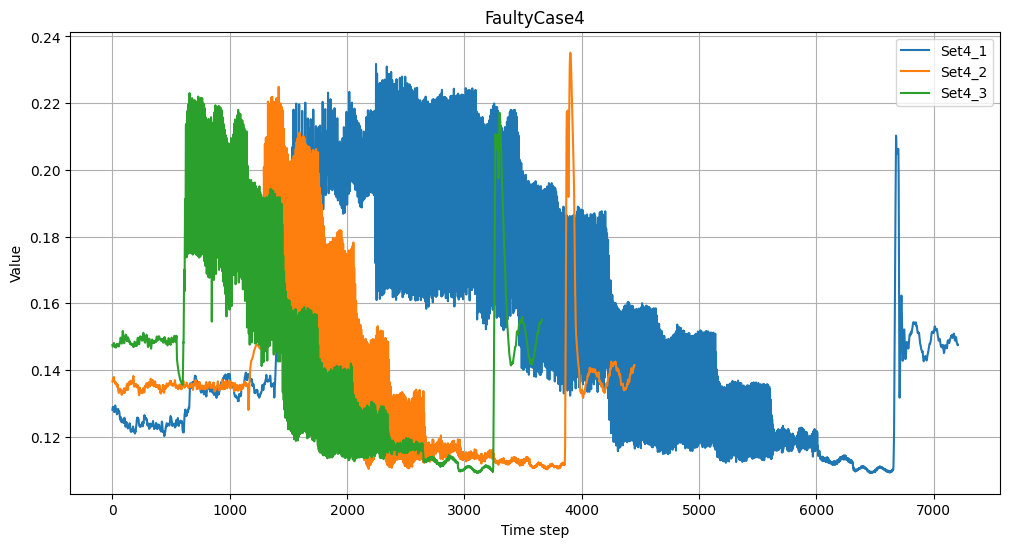

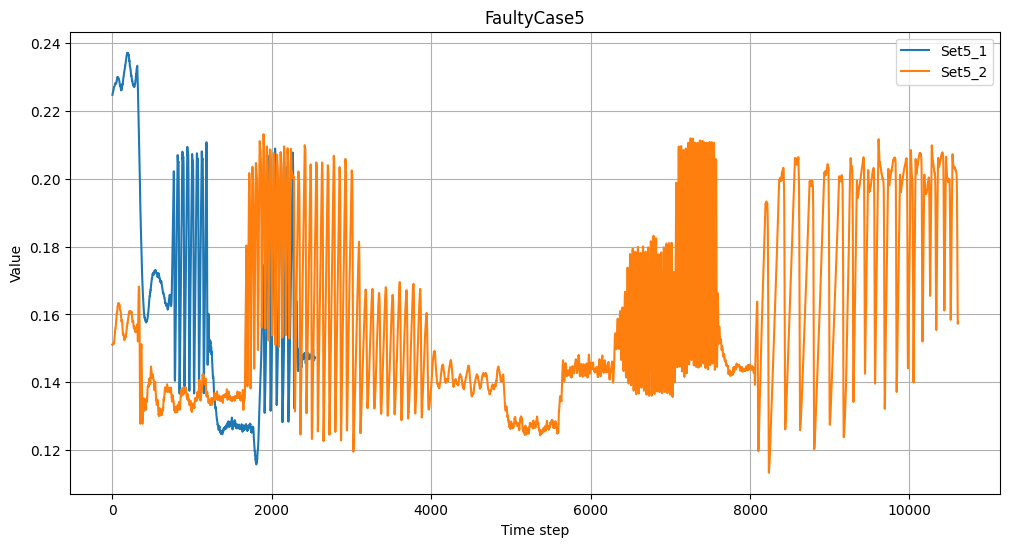

In [5]:
from pathlib import Path
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

# === Load function ===
def load_mat_sets(file_path: Path, set_names):
    data = scio.loadmat(file_path)
    sets = []
    for name in set_names:
        if name in data:
            # Remove last feature
            sets.append(np.delete(data[name], -1, axis=1))
        else:
            print(f"Warning: {name} not found in {file_path}")
    return sets

# === Plot function (only one feature per set) ===
def plot_faulty_case(sets, set_labels, faulty_case_name, feature_idx=0):
    plt.figure(figsize=(12, 6))
    for arr, label in zip(sets, set_labels):
        plt.plot(arr[:, feature_idx], label=label)
    plt.title(f"{faulty_case_name}")
    plt.xlabel("Time step")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# === Main ===
data_dir = Path("..") / "Datasets" / "CVACaseStudy" / "MFP"

# Sets and their variables
all_sets = {
    "FaultyCase1": ["Set1_1", "Set1_2", "Set1_3"],
    "FaultyCase2": ["Set2_1", "Set2_2", "Set2_3"],
    "FaultyCase3": ["Set3_1", "Set3_2", "Set3_3"],
    "FaultyCase4": ["Set4_1", "Set4_2", "Set4_3"],
    "FaultyCase5": ["Set5_1", "Set5_2"]  # Only 2 signals
}

for case_name, vars_list in all_sets.items():
    file_path = data_dir / f"{case_name}.mat"
    sets_data = load_mat_sets(file_path, vars_list)
    plot_faulty_case(sets_data, vars_list, case_name, feature_idx=0)  # first feature

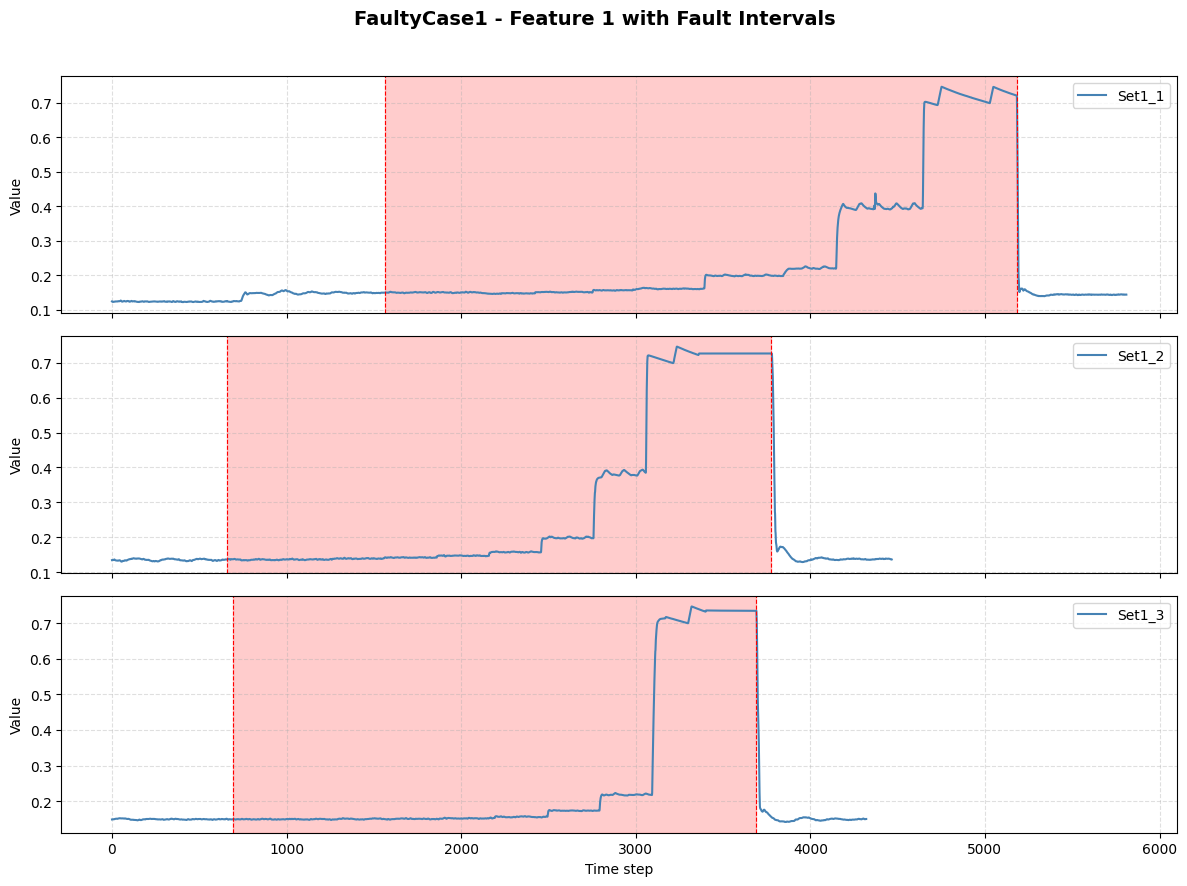

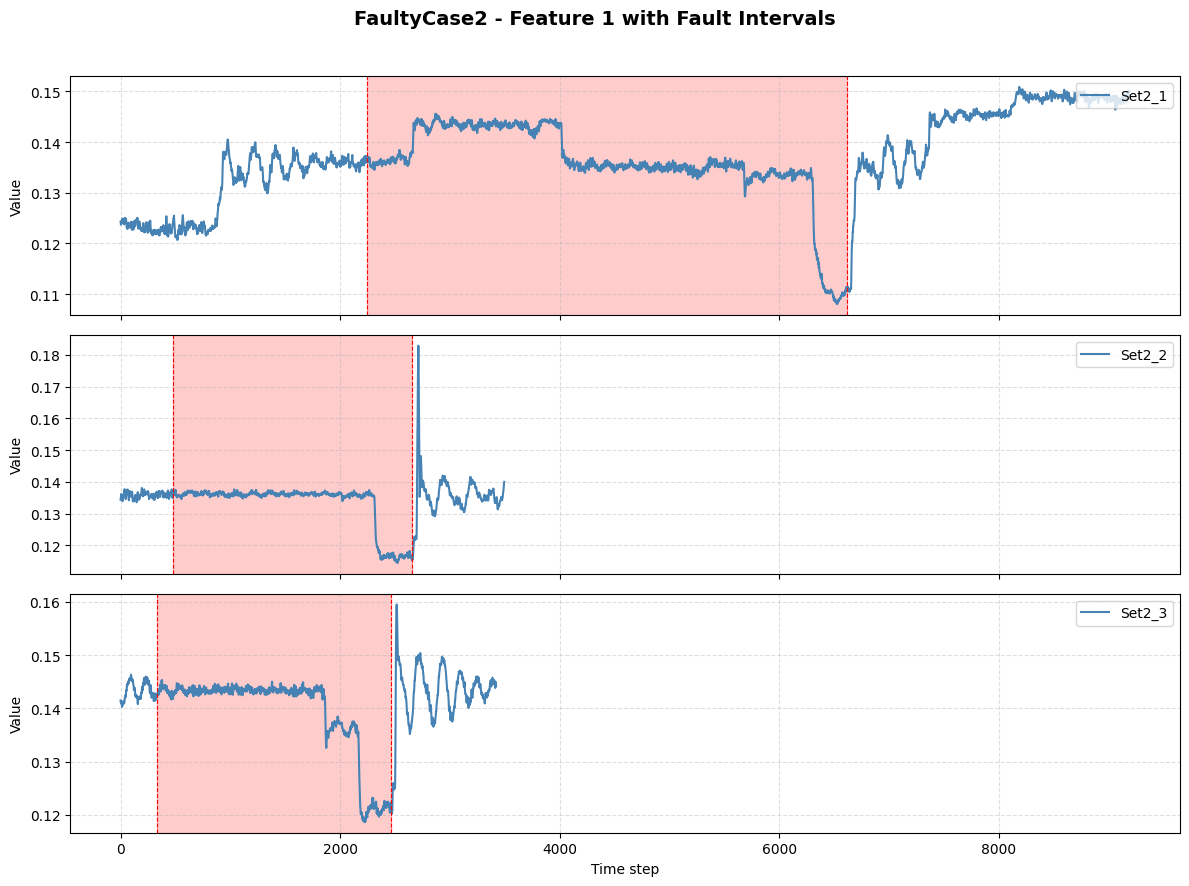

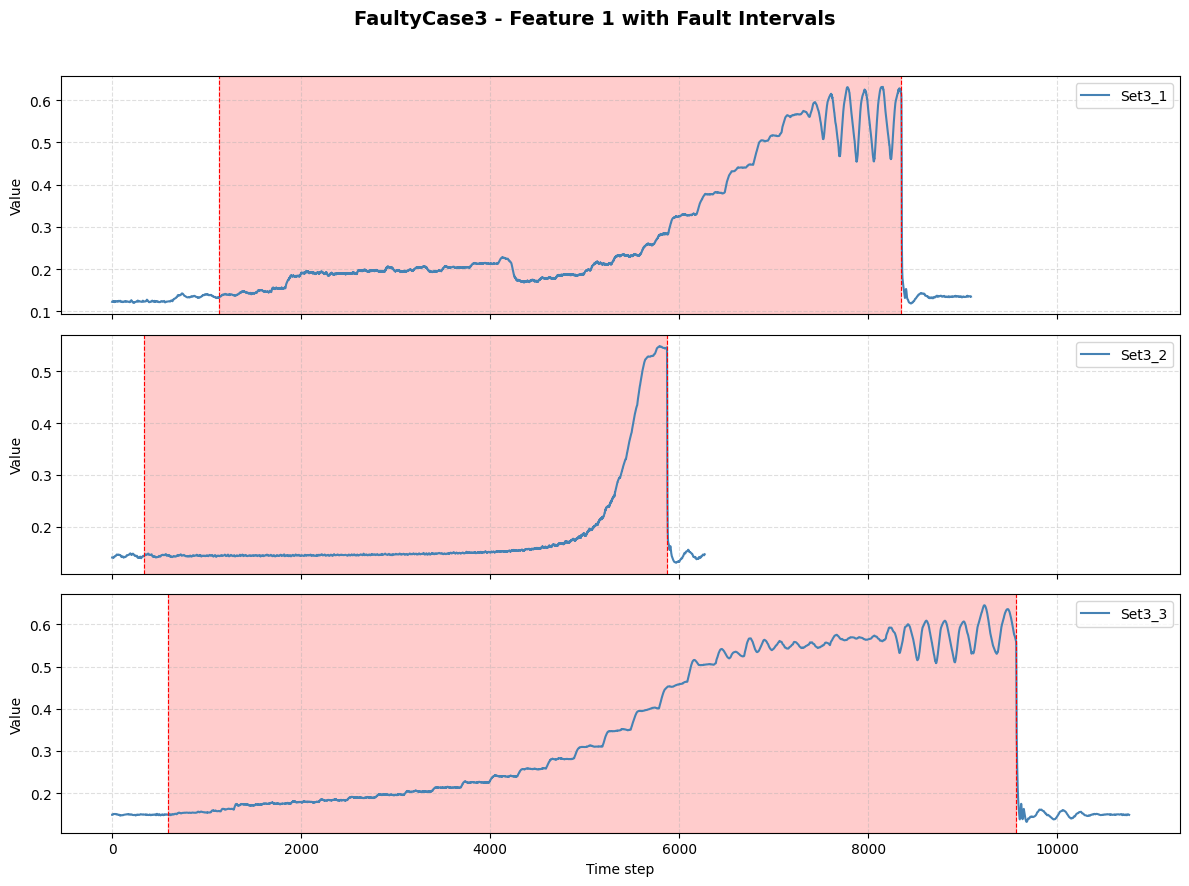

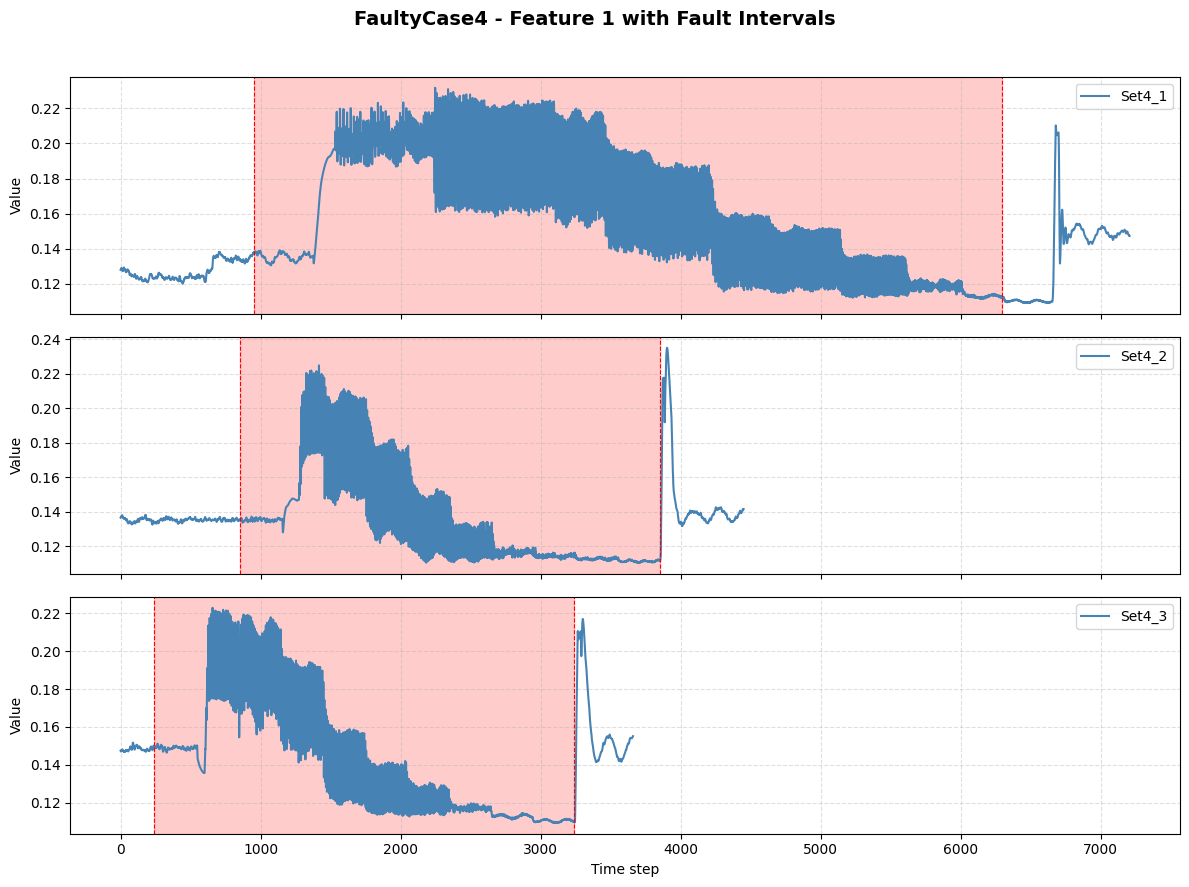

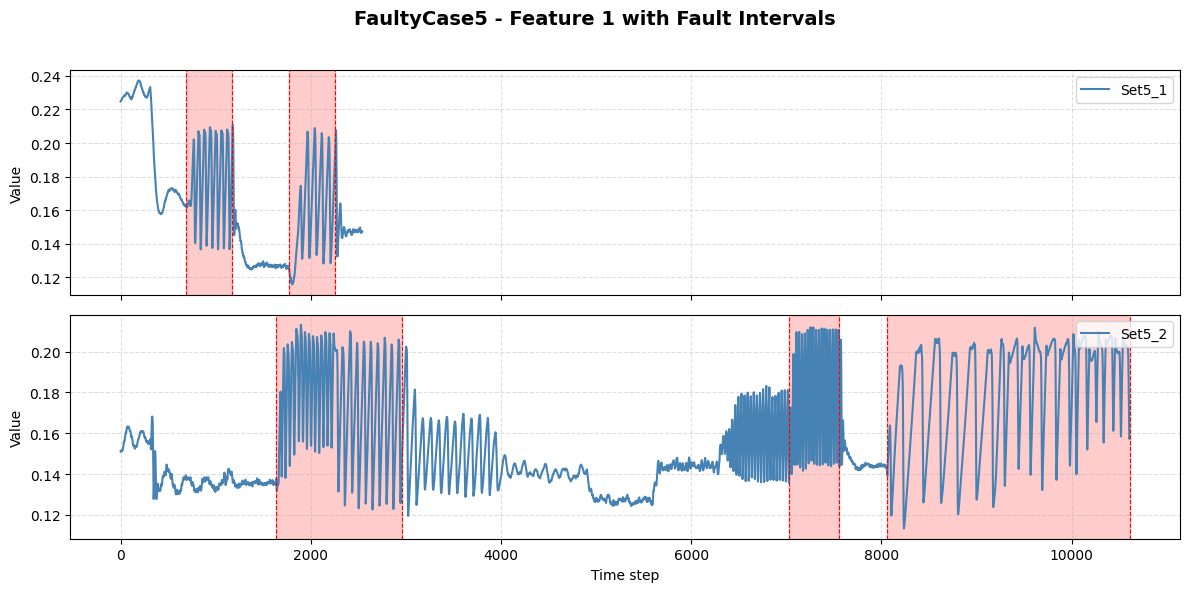

In [ ]:
from pathlib import Path
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

# === Fault intervals (from your tables) ===
fault_intervals = {
    "FaultyCase1": {
        "Set1_1": [(1566, 5181)],
        "Set1_2": [(657, 3777)],
        "Set1_3": [(691, 3691)]
    },
    "FaultyCase2": {
        "Set2_1": [(2244, 6616)],
        "Set2_2": [(476, 2656)],
        "Set2_3": [(331, 2467)]
    },
    "FaultyCase3": {
        "Set3_1": [(1136, 8352)],
        "Set3_2": [(333, 5871)],
        "Set3_3": [(596, 9566)]
    },
    "FaultyCase4": {
        "Set4_1": [(953, 6294)],
        "Set4_2": [(851, 3851)],
        "Set4_3": [(241, 3241)]
    },
    "FaultyCase5": {
        "Set5_1": [(686, 1172), (1772, 2253)],
        "Set5_2": [(1633, 2955), (7031, 7553), (8057, 10608)]
    }
}

# === Load function ===
def load_mat_sets(file_path: Path, set_names):
    data = scio.loadmat(file_path)
    sets = []
    for name in set_names:
        if name in data:
            # Remove last feature
            sets.append(np.delete(data[name], -1, axis=1))
        else:
            print(f"Warning: {name} not found in {file_path}")
    return sets

# === Plot function with fault shading ===
def plot_faulty_case_with_faults(sets, set_labels, faulty_case_name, feature_idx=0):
    fig, axs = plt.subplots(len(sets), 1, figsize=(12, 3 * len(sets)), sharex=True)

    if len(sets) == 1:
        axs = [axs]  # Make it iterable if only 1 subplot

    for ax, arr, label in zip(axs, sets, set_labels):
        ax.plot(arr[:, feature_idx], label=label, color='steelblue', linewidth=1.5)
        
        # Highlight each fault interval for this dataset
        for start, end in fault_intervals[faulty_case_name][label]:
            ax.axvspan(start, end, color='red', alpha=0.2)
            ax.axvline(start, color='red', linestyle='--', linewidth=0.8)
            ax.axvline(end, color='red', linestyle='--', linewidth=0.8)

        ax.set_ylabel("Value")
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', alpha=0.4)

    axs[-1].set_xlabel("Time step")
    fig.suptitle(f"{faulty_case_name} - Feature {feature_idx + 1} with Fault Intervals", fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# def plot_faulty_case_with_faults(sets, set_labels, faulty_case_name, feature_idx=0):
#     plt.figure(figsize=(12, 6))
    
#     for arr, label in zip(sets, set_labels):
#         plt.plot(arr[:, feature_idx], label=label)
        
#         # Shade fault intervals
#         for start, end in fault_intervals[faulty_case_name][label]:
#             plt.axvspan(start, end, color='red', alpha=0.2)
    
#     plt.title(f"{faulty_case_name} - Feature {feature_idx + 1} with Fault Intervals")
#     plt.xlabel("Time step")
#     plt.ylabel("Value")
#     plt.legend()
#     plt.grid(True)
#     plt.show()
    

# === Main ===
data_dir = Path("..") / "Datasets" / "CVACaseStudy" / "MFP"

all_sets = {
    "FaultyCase1": ["Set1_1", "Set1_2", "Set1_3"],
    "FaultyCase2": ["Set2_1", "Set2_2", "Set2_3"],
    "FaultyCase3": ["Set3_1", "Set3_2", "Set3_3"],
    "FaultyCase4": ["Set4_1", "Set4_2", "Set4_3"],
    "FaultyCase5": ["Set5_1", "Set5_2"]
}

for case_name, vars_list in all_sets.items():
    file_path = data_dir / f"{case_name}.mat"
    sets_data = load_mat_sets(file_path, vars_list)
    plot_faulty_case_with_faults(sets_data, vars_list, case_name, feature_idx=0)

In [ ]:

def apply_bias(signal: torch.Tensor, magnitude: float) -> torch.Tensor:
    return signal + magnitude

def apply_drift(signal: torch.Tensor, magnitude: float) -> torch.Tensor:
    drift = torch.linspace(0, magnitude, steps=signal.shape[0], device=signal.device)
    if signal.ndim == 2:
        drift = drift.unsqueeze(-1)
    return signal + drift

def apply_erratic(signal: torch.Tensor, noise_level: float) -> torch.Tensor:
    noise = torch.randn_like(signal) * noise_level
    return signal + noise

def apply_spike(signal: torch.Tensor, magnitude: float, num_spikes: int = 5) -> torch.Tensor:
    signal = signal.clone()
    time_steps = signal.shape[0]
    if signal.ndim == 2:
        feature_dim = signal.shape[1]
        for _ in range(num_spikes):
            t_idx = random.randint(0, time_steps - 1)
            f_idx = random.randint(0, feature_dim - 1)
            signal[t_idx, f_idx] += magnitude * (2 * torch.rand(1).item() - 1)
    else:
        for _ in range(num_spikes):
            t_idx = random.randint(0, time_steps - 1)
            signal[t_idx] += magnitude * (2 * torch.rand(1).item() - 1)
    return signal

def apply_stuck(signal: torch.Tensor) -> torch.Tensor:
    stuck_value = signal[random.randint(0, signal.shape[0] - 1)]
    if signal.ndim == 2:
        stuck_value = stuck_value.unsqueeze(0)
        return stuck_value.repeat(signal.shape[0], 1)
    else:
        return stuck_value.repeat(signal.shape[0])

def inject_anomalies(
        signal: torch.Tensor,
        fault_type: str,
        batch_idx: Optional[int] = None,
        magnitude: float = 0.10,
        noise_level: float = 0.01,
        selected_features: Optional[List[int]] = None,
        stuck_probability: float = 1.0,
        spike_num: int = 5) -> torch.Tensor:
    """
    Inject anomalies into a selected batch of the input signal.

    Args:
        signal: Tensor of shape (B, L, F)
        fault_type: One of ['bias', 'drift', 'erratic', 'spike', 'stuck']
        batch_idx: Which batch index to apply anomaly to. (Required)
        magnitude: Size of bias, drift, or spike.
        noise_level: Standard deviation for erratic noise.
        selected_features: List of feature indices to apply fault. Default: all features.
        stuck_probability: Probability for a feature to be stuck if 'stuck' fault.
        spike_num: Number of spikes if 'spike' fault.

    Returns:
        Tensor with injected anomaly.
    """
    if batch_idx is None:
        raise ValueError("batch_idx must be specified when using batch input.")

    signal = signal.clone()

    B, L, F = signal.shape

    if not (0 <= batch_idx < B):
        raise IndexError(f"batch_idx {batch_idx} is out of range for batch size {B}")

    for f in range(F):
        if (selected_features is None) or (f in selected_features):
            if fault_type == "bias":
                signal[batch_idx, :, f] = apply_bias(signal[batch_idx, :, f], magnitude)
            elif fault_type == "drift":
                signal[batch_idx, :, f] = apply_drift(signal[batch_idx, :, f], magnitude)
            elif fault_type == "erratic":
                signal[batch_idx, :, f] = apply_erratic(signal[batch_idx, :, f], noise_level)
            elif fault_type == "spike":
                signal[batch_idx, :, f] = apply_spike(signal[batch_idx, :, f], magnitude, spike_num)
            elif fault_type == "stuck":
                if random.random() < stuck_probability:
                    signal[batch_idx, :, f] = apply_stuck(signal[batch_idx, :, f])
            else:
                raise ValueError(f"Unsupported fault type: {fault_type}")

    return signal

